value at found scipy minimum [100.  45. -55.] for initial value x0: [10.0, 10.0, -35.0]
phi at scipy minimum 1.8807192199260305e-20
scipy was successfull ? True
number of scipy iterations 29


F at scipy minimum [-1.45661261e-11 -2.18278728e-11 -1.34605216e-10]
F at [100, 45, -55]: [0. 0. 0.]


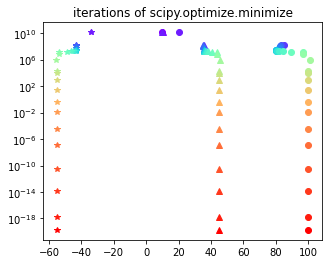

In [7]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import basinhopping, root, brute, differential_evolution
import matplotlib.pyplot as plt
from matplotlib import cm

# let us first define the function and its jacobian
def F(x):
    # here x is a np.array with 3 entries, 0, 1, 2 - call it for one x,y,z
    return np.array(
        [x[0]*x[1]**2 + 2*x[1]**2*x[2] + 10*x[1]**2 + x[0] + 2*x[2] + 10,
        x[0]*x[2]**2 - 2*x[1]*x[2]**2 - 10*x[2]**2 + 2*x[0] -4*x[1] - 20,
        5*x[1]**3 + 4*x[2]**3 + 4*x[1]**2*x[2] + 5*x[1]*x[2]**2 - 5*x[1]**2 - 5*x[2]**2] 
        )

# jacobian matrix of F (3x3)
def J(x):
    # here x is a np.array with 3 entries, 0, 1, 2
    return np.array(
        [[x[1]**2 + 1, 2*x[1]*x[0] + 4*x[1]*x[2] + 20*x[1] , 2*x[1]**2 + 2],
        [x[2]**2 + 2, -2*x[2]**2 - 4, 2*x[2]*x[0] - 4*x[1]*x[2] - 20*x[2]],
        [0, 15*x[1]**2 + 8*x[1]*x[2] + 5*x[2]**2 - 10*x[1], 12*x[2]**2 + 4*x[1]**2 + 10*x[1]*x[2] - 10*x[2]]
        ])

def phi(x):
    # here x is a np.array with 3 entries, 0, 1, 2
	return F(x)[0]**2 + F(x)[1]**2 + F(x)[2]**2

def Jphi(x):
    # here x is a np.array with 3 entries, 0, 1, 2
    return np.array(
        [2*J(x)[0][0]*F(x)[0] + 2*J(x)[1][0]*F(x)[1] + 2*J(x)[2][0]*F(x)[2],
        2*J(x)[0][1]*F(x)[0] + 2*J(x)[1][1]*F(x)[1] + 2*J(x)[2][1]*F(x)[2],
        2*J(x)[0][2]*F(x)[0] + 2*J(x)[1][2]*F(x)[1] + 2*J(x)[2][2]*F(x)[2]
        ])

phi_history = []
x_values = []
y_values = []
z_values = []
def callback(x):
    phi_history.append(phi(x))
    x_values.append(x[0])
    y_values.append(x[1])
    z_values.append(x[2])

#scipy minimize
#x0 = [80., 40., -50.]
x0 = [10., 10., -35.]
res = minimize(phi, x0, jac=Jphi,callback=callback) # method, jac
print("value at found scipy minimum", res.x, "for initial value x0:", x0)
print("phi at scipy minimum", phi(res.x))
print("scipy was successfull ?", res.success)
print("number of scipy iterations", len(x_values))
print("\n")
# now we check that it is indeed a solution of F
print("F at scipy minimum", F(res.x))
print("F at [100, 45, -55]:", F([100., 45., -55.]))

fig = plt.figure(figsize=(5, 4))
color = iter(cm.rainbow(np.linspace(0, 1, len(x_values))))
for i in range(len(x_values)):
    c = next(color)
    plt.plot(x_values[i],phi([x_values[i], y_values[i], z_values[i]]), 'o', c=c)
    plt.plot(y_values[i],phi([x_values[i], y_values[i], z_values[i]]), '^', c=c)
    plt.plot(z_values[i],phi([x_values[i], y_values[i], z_values[i]]), '*', c=c)
plt.yscale("log")
plt.title("iterations of scipy.optimize.minimize");

In [32]:
minimizer_kwargs = {"method": "BFGS"}
# two step method that combines a global stepping algorithm with local minimization at each step
ret = basinhopping(phi, [0., 1., 1.], niter=1000, stepsize=0.001,minimizer_kwargs=minimizer_kwargs)
print("Basin Hopping global minimum: " , ret.x , " phi(x) = ", ret.fun)

# root finds the root of a vector function
sol = root(F, [70.,40.,-40.], jac=J, method='lm')
print("root algorithm, root of F: " , sol.x, "phi(x) = ", sol.fun)

rranges = [(50, 120), (30, 60), (-100, 0)]
resbrute = differential_evolution(phi, rranges, tol=1e-5)
print("diff evolution, root of F:", resbrute.x, "phi(x) = ", resbrute.fun)
#print("root of F: " , resbrute[0])
#print("F at root =", phi(resbrute[0]) )

Basin Hopping global minimum:  [ 6.62127163 -0.05834722 -0.45029094]  phi(x) =  302.59523097103704
root algorithm, root of F:  [ 6.6212795  -0.05836126 -0.45028731] phi(x) =  [15.77425018 -7.18539431 -1.46231701]
diff evolution, root of F: [100.  45. -55.] phi(x) =  0.0


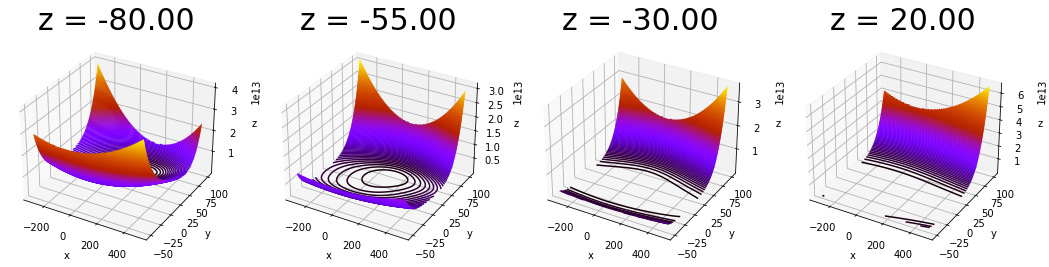

In [42]:
from mpl_toolkits.mplot3d import axes3d

def V(x,y,z):
     # this takes in x, y and z each as np.arrays 
     f1 = x*y**2 + 2*y**2*z + 10*y**2 + x + 2*z + 10
     f2 = x*z**2 - 2*y*z**2 - 10*z**2 + 2*x -4*y - 20
     f3 = 5*y**3 + 4*z**3 + 4*y**2*z + 5*y*z**2 - 5*y**2 - 5*z**2
     return f1**2 + f2**2 + f3**2

# create a grid 
X,Y = np.mgrid[-300:500:100j, -50:100:100j]
Z_vals = [-80, -55, -30, 20]
num_subplots = len( Z_vals)


fig = plt.figure(figsize=(18, 6))
for i,z in enumerate(Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    contour = ax.contour(X, Y, V(X,Y,z), 128,cmap=cm.gnuplot)
    ax.set_title('z = %.2f'%z, fontsize=30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #cbar = fig.colorbar(contour)
#fig.savefig('contours.png', facecolor='grey', edgecolor='none')

In [41]:
def Newton_system(F, J, x, eps):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, 2)  # l2 norm of vector
    iteration_counter = 0
    while (np.abs(F_norm) > np.sqrt(eps)) and (iteration_counter) < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, 2)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if np.abs(F_norm) > np.sqrt(eps):
        iteration_counter = -1
    return x, iteration_counter

def Broyden_system(Fev, Jac, x, eps=1e-10, maxIters=10000):
    iteration_counter = 0
    F = Fev(x)
    J = Jac(x)
    F_norm = np.linalg.norm(F, 2)
 
    while (np.abs(F_norm) > np.sqrt(eps)) and (iteration_counter) < maxIters:
        delta = np.linalg.solve(J, -F) 
        x = x + delta
        F_new = Fev(x)
        deltaF = F_new - F
 
        J = J + (np.outer ((deltaF - np.dot(J,delta)),delta)) / (np.dot(delta,delta))

        F = F_new
        F_norm = np.linalg.norm(F, 2)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if np.abs(F_norm) > np.sqrt(eps):
        iteration_counter = -1

    return x, iteration_counter  

In [5]:
x, n = Newton_system(F, J, x=np.array([0., 1., 1.]), eps=1e-12)
print ("Niter %i" %n, "Value %s" %x)

def B(x):
	return np.array(
        [[1, 0 , 0], [0, 1, 0], [0, 0, 1]])
xB, nB = Broyden_system(F, B, x=np.array([90., 40., -50.]), eps=1e-3)

print ("Niter %i" %nB, "Value %s" %xB)

Niter 29 Value [100.  45. -55.]
Niter 25 Value [100.00000043  45.00000021 -55.00000021]
